In [5]:
import geopandas
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from shapely.geometry import Polygon

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**2.	Carga los datos de los Estados de la República Mexicana en un GeoDataFrame.**

In [25]:
costco = pd.read_csv('/content/drive/MyDrive/tiendaCostco.csv')

**3.	Carga los datos de la localización de las sucursales de Costco® en un DataFrame.**

In [12]:
mexico = geopandas.read_file('/content/drive/MyDrive/mexican_states/mexican-states.shp')

 **4.	Convierte los datos de la localización de las sucursales de Costco® en un GeoDataFrame, creando puntos a partir de la longitud y latitud de cada sucursal.**

In [26]:
costco.columns

Index(['id', ' nombre', ' direccion', ' ubicacion', ' latitud', ' longitud',
       ' tel centro llantero'],
      dtype='object')

In [27]:
costco.columns = costco.columns.str.strip()

In [28]:
tiendas_c = geopandas.GeoDataFrame(costco, geometry = geopandas.points_from_xy(costco.longitud, costco.latitud))

**5.	Agrega una columna a los estados que indique la región a la que pertenecen y separa el GeoDataFrame por regiones en lugar de por estados:**

**a)	Centro: Tlaxcala, Puebla, CDMX, Morelos, Estado de México e Hidalgo**
**b)	Centro Oeste: Jalisco, Michoacán, Colima, Aguascalientes, Nayarit,Zacatecas, San Luis Potosí, Guanajuato y Querétaro.**
**c)	Noreste: Chihuahua, Coahuila, Nuevo León, Tamaulipas y Durango**
**d)	Noroeste: Baja California Norte, Baja California Sur, Sonora y Sinaloa**
**e)	Sureste: Guerrero, Veracruz, Oaxaca, Tabasco, Chiapas, Campeche, Yucatán y Quintana Roo**


In [42]:
centro = mexico.loc[2:7]
centrooeste = mexico.loc[12:16].append(mexico.loc[0:1]).append(mexico.iloc[[23]]).append(mexico.loc[[29]])
noreste = mexico.loc[8:10].append(mexico.loc[17:18])
noroeste = mexico.loc[27:28].append(mexico.iloc[[11]]).append(mexico.iloc[[21]])
sureste = mexico.loc[19:20].append(mexico.iloc[[22]]).append(mexico.loc[24:26]).append(mexico.loc[30:31])

<ipython-input-42-cf44f5052b91>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  centrooeste = mexico.loc[12:16].append(mexico.loc[0:1]).append(mexico.iloc[[23]]).append(mexico.loc[[29]])
<ipython-input-42-cf44f5052b91>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  centrooeste = mexico.loc[12:16].append(mexico.loc[0:1]).append(mexico.iloc[[23]]).append(mexico.loc[[29]])
<ipython-input-42-cf44f5052b91>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  noreste = mexico.loc[8:10].append(mexico.loc[17:18])
<ipython-input-42-cf44f5052b91>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  noroeste = mexico.loc[27:28].append(mexico.iloc[[11]]

In [44]:
mexico['Regiones'] = ['centrooeste','centrooeste','centro','centro','centro','centro','centro','centro','noreste','noreste','noreste','noroeste','centrooeste','centrooeste','centrooeste','centrooeste','centrooeste','noreste','noreste','sureste','sureste','noroeste','sureste','centrooeste','sureste','sureste','sureste','noroeste','noroeste','centrooeste','sureste','sureste']

In [45]:
mexico

,ISO3166-2,admin_leve,boundary,is_in_coun,is_in_co_1,name,name_en,name_es,name_pl,name_ru,name_uk,place,ref,type,wikidata,wikipedia,geometry,Regiones
0,MX-AGU,4,administrative,México,MX,Aguascalientes,None,None,None,None,None,None,None,None,None,None,"POLYGON ((-102.74530 21.72005, -102.74859 21.7...",centrooeste
1,MX-COL,4,administrative,México,MX,Colima,None,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-103.48859 18.96489, -103.4884...",centrooeste
2,MX-TLA,4,administrative,México,MX,Tlaxcala,Tlaxcala,Tlaxcala,Tlaxcala,Тласкала,Тласкала,state,TLA,boundary,Q82681,es:Tlaxcala,"POLYGON ((-98.54150 19.46082, -98.54158 19.460...",centro
3,MX-CMX,4,administrative,México,MX,Ciudad de México,Mexico City,Ciudad de México,None,None,None,state,DIF,boundary,Q1489,en:Mexico City,"POLYGON ((-99.27870 19.13170, -99.28259 19.138...",centro
4,MX-MOR,4,administrative,México,MX,Morelos,Morelos,Morelos,Morelos,Морелос,Морелос,state,MOR,boundary,Q66117,es:Morelos,"POLYGON ((-98.90339 19.03848, -98.90061 19.038...",centro
5,MX-MEX,4,administrative,México,MX,México,Mexico,México,Meksyk,Мехико,Мехіко,state,MEX,boundary,Q82112,es:Estado de México,"POLYGON ((-100.13794 20.04431, -100.13759 20.0...",centro
6,MX-HID,4,administrative,México,MX,Hidalgo,Hidalgo,Hidalgo,Hidalgo,Идальго,Ідальго,state,HID,boundary,Q80903,es:Estado de Hidalgo,"POLYGON ((-99.73527 20.56486, -99.73525 20.564...",centro
7,MX-PUE,4,administrative,México,MX,Puebla,Puebla,Puebla,Puebla,Пуэбла,Пуебла,state,PUE,boundary,Q79923,es:Puebla,"POLYGON ((-97.26671 19.38249, -97.26549 19.381...",centro
8,MX-NLE,4,administrative,México,MX,Nuevo León,Nuevo León,Nuevo León,Nuevo León,Нуэво-Леон,Нуево-Леон,state,NLE,boundary,Q15282,es:Nuevo León,"POLYGON ((-99.94766 23.49713, -99.94611 23.490...",noreste
9,MX-COA,4,administrative,México,MX,Coahuila de Zaragoza,Coahuila,Coahuila de Zaragoza,Coahuila,Коауила,Коауїла,state,COA,boundary,Q53079,es:Coahuila de Zaragoza,"POLYGON ((-103.50895 25.27801, -103.50984 25.2...",noreste


In [46]:
regiones_df = mexico.dissolve(by = 'Regiones')

In [48]:
regiones_df = regiones_df.loc[:,'geometry']

In [50]:
regiones_gdf = geopandas.GeoDataFrame(geopandas.GeoSeries(regiones_df))

In [51]:
regiones_gdf

,geometry
Regiones,
centro,"POLYGON ((-99.06596 18.33265, -99.06612 18.333..."
centrooeste,"MULTIPOLYGON (((-106.24013 21.33311, -106.2398..."
noreste,"POLYGON ((-104.24942 22.74840, -104.24981 22.7..."
noroeste,"MULTIPOLYGON (((-114.29280 27.11006, -114.2928..."
sureste,"MULTIPOLYGON (((-96.05972 15.77985, -96.06001 ..."


<Axes: >

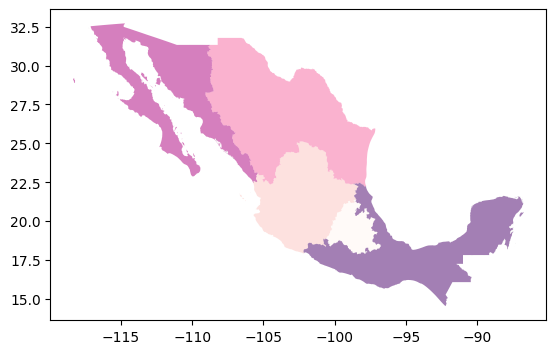

In [56]:
regiones_gdf.plot(alpha = 0.5, cmap = 'RdPu')

**6.	Asegura que ambos GeoDataFrames utilicen el CRS epsg=3395 que usa metros como medida de distancia.**

In [57]:
tiendas_c = tiendas_c.set_crs(regiones_gdf.crs)
regiones_gdf = regiones_gdf.to_crs(epsg = 3395)
tiendas_c = tiendas_c.to_crs(epsg = 3395)

**7.	Crea un buffer de 120 km alrededor de los puntos de localización de cada sucursal.**

In [58]:
tiendas_c['geometry'] = tiendas_c.buffer(120000)

<Axes: >

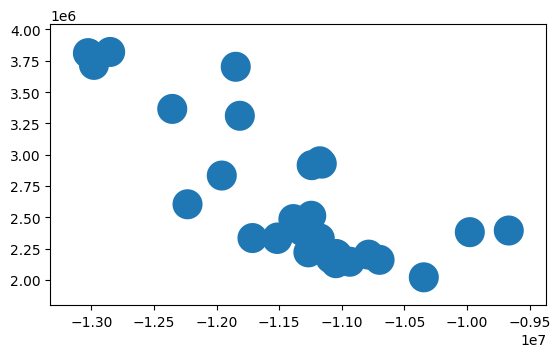

In [59]:
tiendas_c.plot()

**8.	Grafica la intersección de las regiones con los círculos creados a partir de la localización de las sucursales.**

<Axes: >

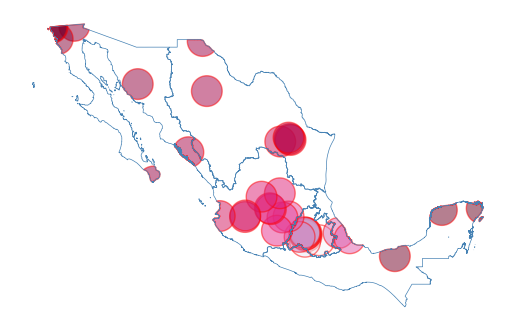

In [72]:
inter = geopandas.overlay(regiones_gdf, tiendas_c, how = 'intersection')
ax = regiones_gdf.boundary.plot(color = 'steelblue', linewidth = 0.5)
ax.axis('off')

inter.plot(ax = ax, alpha = 0.5, edgecolor = 'red', cmap = 'PuRd')

**9.	Identifica las regiones en donde se requiere más cobertura y responde la pregunta: ¿En qué regiones del país (Centro, Centro Oeste, Noreste, Noroeste, Sureste) NO es conveniente abrir una nueva sucursal debido a la falta de cobertura de entregas a domicilio?**

La región en donde se requiere más cobertura de tiendas Costco, y que en consecuencia NO es conveniente que la empresaria establezca una sucursal de sus restaurantes es el **Sureste**.
Por otro lado, solo en algunas ciudades de las regiones **Noroeste y Noreste** la empresaria podría pensar en poner una sucursal.
Por último, se concluye que las regiones **Centro y Centrooeste** se son las más apropiadas para que la empresaria pueda abrir nuevas sucursales. Para determinar la viabilidad de esta propuesta se sugiere comenzar un análisis que identifique las sucursales existentes y hacer una operación de conjuntos por "Diferencia" con respecto a los puntos destacados en el mapa anterior.